# AssocPlace

# Set up Analysis

### Initial Imports

In [3]:
import sys; sys.prefix

'/Users/sgagnon/anaconda'

In [4]:
import pandas as pd
import moss
from scipy import stats
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path as op

# Gather project info & functions
from ap_setup_project import *

# for plotting
sns.set(style='ticks', context='poster', font_scale=1.3)
%matplotlib inline

# R for stats
# %load_ext rpy2.ipython
# %R require(lme4)
# %R require(lmerTest)

/Users/sgagnon/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
sns.__path__

['/Users/sgagnon/anaconda/lib/python2.7/site-packages/seaborn']

### Gather experiment info

In [6]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/AssocPlace')
dirs['datadir'] = op.join(dirs['basedir'], 'data')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'group_info.csv')

In [7]:
exp = gather_experiment_info(exp_name='AP', dirs=dirs)

In [8]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info.head()

,subid,group,gender,remove,anxious,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,ap100,control-fmri,male,NaN,3,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
1,ap101,control-fmri,male,NaN,2,5,6,2,2,8.5,-7,2.0,5.5,2.0,5.5
2,ap102,control-fmri,male,NaN,4,2,5,5,4,9.0,2,4.5,3.5,4.5,3.5
3,ap103,control-fmri,male,NaN,2,3,5,2,2,6.5,-4,2.0,4.0,2.0,4.0
4,ap104,control-fmri,male,NaN,3,5,6,3,4,8.0,-5,3.0,5.5,3.0,5.5


### Subj info

In [9]:
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info

,subid,group,gender,remove,anxious,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,ap100,control-fmri,male,NaN,3,2,3,3,4,4.5000,1,3.0,2.5,3.0,2.5
1,ap101,control-fmri,male,NaN,2,5,6,2,2,8.5000,-7,2.0,5.5,2.0,5.5
2,ap102,control-fmri,male,NaN,4,2,5,5,4,9.0000,2,4.5,3.5,4.5,3.5
3,ap103,control-fmri,male,NaN,2,3,5,2,2,6.5000,-4,2.0,4.0,2.0,4.0
4,ap104,control-fmri,male,NaN,3,5,6,3,4,8.0000,-5,3.0,5.5,3.0,5.5
5,ap105,control-fmri,male,NaN,6,2,5,6,3,8.0000,5,6.0,3.5,6.0,3.5
6,ap106,control-fmri,male,NaN,3,2,3,3,2,8.0000,1,3.0,2.5,3.0,2.5
7,ap107,control-fmri,male,NaN,5,3,3,5,4,6.0000,4,5.0,3.0,5.0,3.0
8,ap108,control-fmri,male,NaN,3,2,3,3,3,7.0000,1,3.0,2.5,3.0,2.5
9,ap109,control-fmri,male,NaN,5,2,7,5,4,10.0000,1,5.0,4.5,5.0,4.5


### Set up filepaths & load in data

In [10]:
ds = pd.DataFrame() # study
dt = pd.DataFrame() # test
study = True
test = True
questionnaires_shock  = True
questionnaires_post  = True

for subid in subj_info.subid:
    print subid
    
    if study:
        # add study file
        study_file = op.join(dirs['datadir'], subid, subid + '_behav_study.csv')
        d = pd.read_csv(study_file)
        d['subid'] = subid
        ds = ds.append(d, ignore_index=True)
    
    if test:
        # add test file
        test_file = op.join(dirs['datadir'], subid, subid + '_behav_freeresp.csv')
        d2 = pd.read_csv(test_file)
#         print d2.head()
        d2['subid'] = subid
        
        dt = dt.append(d2, ignore_index=True)
        
# Compiled group data
if questionnaires_shock:
    q_file = op.join(dirs['basedir'], 'data/Quest/Questionnaires_shockblock_group.csv')
    dq_shock = pd.read_csv(q_file, index_col=0)

if questionnaires_post:
    q_file = op.join(dirs['basedir'], 'data/Quest/Questionnaires_group.csv')
    dq_post = pd.read_csv(q_file, index_col=0)


ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


#### Remove runs for some subjects

In [11]:
dt.shape

(11789, 19)

In [12]:
subj106_run1 = (dt.subid == 'ap106') & (dt.run == 1) # this subj said they likely reversed responses for run 1, so remove
dt = dt.loc[np.invert(subj106_run1),:]

In [13]:
11789 - 11747

42

In [14]:
dt.shape

(11747, 19)

#### Remove some trials for beach repeats (48 trials total, 2 for 24 subs)

In [15]:
data = dt.loc[dt.associate == 'beach'].groupby(['subid']).count().reset_index()
beach_counts = dt.loc[dt.associate == 'beach'].groupby(['subid']).count().reset_index()
sub_list = beach_counts[beach_counts.trial == 2].subid
trials_remove = (dt.subid.isin(sub_list)) & (dt.associate == 'beach')
dt = dt.loc[np.invert(trials_remove),:]
dt.shape

(11699, 19)

In [16]:
11747 - 11699

48

#### Remove a couple trials from ap151 from when talking to him re: squeezeball

Note that two preceding trials are removed for shock and shock + 1

In [17]:
trials_remove = (dt.subid == 'ap151') & (dt.target.isin(['OLIVE', 'CRAB']))
dt = dt.loc[np.invert(trials_remove),:]
dt.shape

(11697, 19)

#### Remove beach from ds too.

In [18]:
ds.head()

,index,run,trial,onset,duration,cond,repType,repCount,word,pic,resp,respRT,ISIresp,ISIrespRT,subid
0,1,1,1,10.0055,1.9951,WI,4,1,PASSPORT,dining_room,R,1.4675,NR,3.0,ap100
1,2,1,2,22.0640,-10.0630,WO,2,1,MANURE,canyon,R,2.2748,NR,3.0,ap100
2,3,1,3,34.1197,-22.1181,WI,2,1,POWDER,dentists_office,R,2.0843,NR,3.0,ap100
3,4,1,4,46.1764,-34.1748,WO,4,1,BANDIT,cemetery,R,1.7034,NR,3.0,ap100
4,5,1,5,58.2336,-46.2332,WO,4,2,BANDIT,cemetery,R,1.0503,NR,3.0,ap100


In [19]:
print ds.shape
sub_list = beach_counts[beach_counts.trial == 2].subid
trials_remove = (ds.subid.isin(sub_list)) & (ds.pic == 'beach')
ds = ds.loc[np.invert(trials_remove),:]
print ds.shape

(23646, 15)
(23502, 15)


In [20]:
23646 - 23502

144

### Assign subid to group (pilot, control, stress) and gender (male, female)

In [21]:
ds = ds.merge(subj_info, on='subid', how='outer')
dt = dt.merge(subj_info, on='subid', how='outer')

### Number subjects per group

In [22]:
ds.groupby(['subid', 'group']).mean().reset_index().groupby('group').count().subid

group
control-fmri    23
stress-fmri     24
Name: subid, dtype: int64

In [23]:
dt.groupby(['subid', 'group']).mean().reset_index().groupby('group').count().subid

group
control-fmri    23
stress-fmri     24
Name: subid, dtype: int64

#### Male counts

In [24]:
dt[dt.gender=='male'].groupby(['subid', 'group']).mean().reset_index().groupby('group').count().subid

group
control-fmri    23
stress-fmri     24
Name: subid, dtype: int64

# Preprocessing

## Study

In [25]:
ds.head()

,index,run,trial,onset,duration,cond,repType,repCount,word,pic,...,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,1,1,1,10.0055,1.9951,WI,4,1,PASSPORT,dining_room,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
1,2,1,2,22.0640,-10.0630,WO,2,1,MANURE,canyon,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
2,3,1,3,34.1197,-22.1181,WI,2,1,POWDER,dentists_office,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
3,4,1,4,46.1764,-34.1748,WO,4,1,BANDIT,cemetery,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
4,5,1,5,58.2336,-46.2332,WO,4,2,BANDIT,cemetery,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5


##### Deal with no responses (NR): Set ISI resp as resp, if ISI was within a second after stim-offset

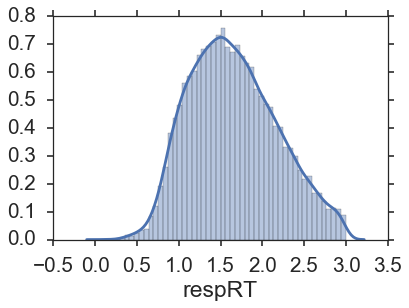

In [26]:
sns.distplot(ds.respRT[ds.resp != 'NR'])

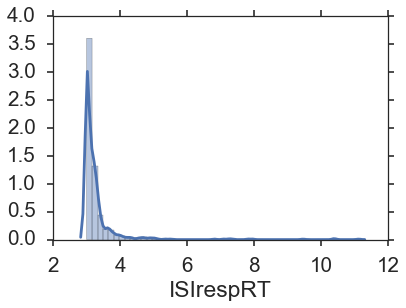

In [27]:
sns.distplot(ds.ISIrespRT[ds.resp == 'NR'])

In [28]:
ds.respRT[(ds.resp == 'NR') & (ds.ISIrespRT < 4)] = ds.ISIrespRT[(ds.resp == 'NR') & (ds.ISIrespRT < 4)]
ds.resp[(ds.resp == 'NR') & (ds.ISIrespRT < 4)] = ds.ISIresp[(ds.resp == 'NR') & (ds.ISIrespRT < 4)]

/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


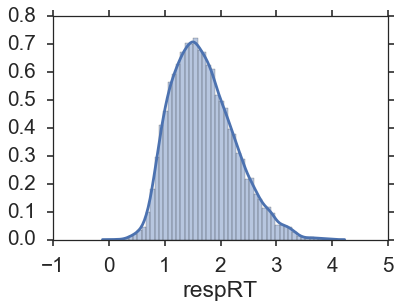

In [29]:
sns.distplot(ds.respRT[ds.resp != 'NR'])

In [30]:
ds = ds.replace(to_replace='WI', value='indoor')
ds = ds.replace(to_replace='WO', value='outdoor')
ds = ds.replace(to_replace='UR', value='unrelated')
ds = ds.replace(to_replace='R', value='related')
ds = ds.replace(to_replace='NR', value='no response')

ds.head()

,index,run,trial,onset,duration,cond,repType,repCount,word,pic,...,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,1,1,1,10.0055,1.9951,indoor,4,1,PASSPORT,dining_room,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
1,2,1,2,22.0640,-10.0630,outdoor,2,1,MANURE,canyon,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
2,3,1,3,34.1197,-22.1181,indoor,2,1,POWDER,dentists_office,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
3,4,1,4,46.1764,-34.1748,outdoor,4,1,BANDIT,cemetery,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
4,5,1,5,58.2336,-46.2332,outdoor,4,2,BANDIT,cemetery,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5


## Test

In [31]:
dt.head()

,index,run,trial,onset,duration,cond,shockCond,shockTrial,target,associate,...,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,1,1,1,12.0191,10.6661,TO_4,safe,0,BANDIT,cemetery,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
1,2,1,2,22.7129,9.1242,F,safe,0,WALRUS,foil,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
2,3,1,3,31.8642,9.4224,TI_2,safe,0,VIOLIN,throne_room,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
3,4,1,4,41.3132,11.3389,TO_2,safe,0,MEDAL,hayfield,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
4,5,1,5,52.6786,9.7644,TO_2,safe,0,MANURE,canyon,...,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5


#### Distribution of RTs during ITI

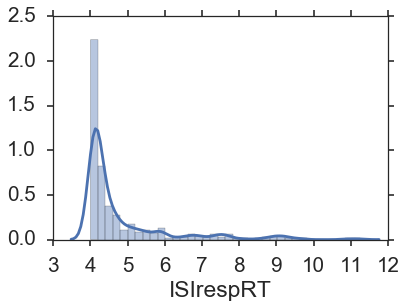

In [32]:
sns.distplot(dt.ISIrespRT[(dt.ISIresp != 'NR')] + 4)

In [33]:
# drop this column so join function doesn't get confused
dt = dt.drop('index',1)

# Split cond to condition and reps
dt['cond_orig'] = dt['cond']
dt = dt.drop('cond', 1)
dt.cond_orig[dt.cond_orig == 'F'] = 'F_0'
dt = dt.join(pd.DataFrame(dt.cond_orig.str.split('_').tolist(), columns= ['cond', 'reps']))

#Replace no responses with ISI responses, update RT (change resp last), but only if ISI within a sec after offset
dt.respRT[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] = dt.ISIrespRT[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] + 4
dt.acc[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] = dt.ISIacc[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]
dt.accSpec[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] = dt.ISIaccSpec[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]
dt.resp[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] = dt.ISIresp[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]

drop_cols = ['ISIrespRT', 'ISIresp', 'ISIacc', 'ISIaccSpec']
for drop_col in drop_cols:
    dt = dt.drop(drop_col,1)

# Remove shock and post shock trials
shockTrials = pd.Series(dt.shockTrial)
lagged = shockTrials.shift(1) # shift forward one
combined = lagged + shockTrials

dt['shock_and_post'] = combined # merged; shock and post shock = 1
dt.shock_and_post[0] = dt.shockTrial[0] # first trial = first trial since no prev
dt.ix[dt.group == 'control-fmri', 'shock_and_post'] = 0 # set controls to 0
dt.ix[dt.shockCond == 'safe', 'shock_and_post'] = 0 # set safe cond to 0

dt = dt.query('shock_and_post < 1') #remove trials
print set(dt.shockTrial) # confirm that it worked; shockTrial = 0 only (1s for controls/safe)
dt = dt.drop('shockTrial',1)
dt = dt.drop('shock_and_post',1)

# reset index post removing shock trials
dt = dt.reset_index()
dt = dt.drop('index',1)

dt.head()

/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to b

set([0, 1])


/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,run,trial,onset,duration,shockCond,target,associate,resp,acc,accSpec,...,life_stress,sleep,net_neg,neg,pos,negative,positive,cond_orig,cond,reps
0,1,1,12.0191,10.6661,safe,BANDIT,cemetery,TI,SM,SMO_Hi,...,4,4.5,1,3.0,2.5,3.0,2.5,TO_4,TO,4
1,1,2,22.7129,9.1242,safe,WALRUS,foil,F,CR,CR,...,4,4.5,1,3.0,2.5,3.0,2.5,F_0,F,0
2,1,3,31.8642,9.4224,safe,VIOLIN,throne_room,TI,H,HI_Hi,...,4,4.5,1,3.0,2.5,3.0,2.5,TI_2,TI,2
3,1,4,41.3132,11.3389,safe,MEDAL,hayfield,TO,H,HO_Hi,...,4,4.5,1,3.0,2.5,3.0,2.5,TO_2,TO,2
4,1,5,52.6786,9.7644,safe,MANURE,canyon,TO,H,HO_Hi,...,4,4.5,1,3.0,2.5,3.0,2.5,TO_2,TO,2


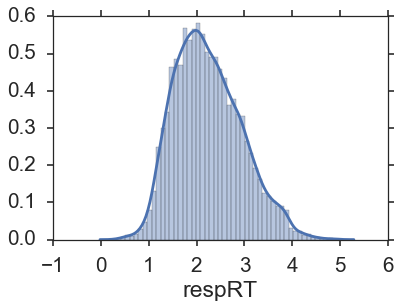

In [34]:
sns.distplot(dt.respRT[(dt.resp != 'NR')])

In [35]:
dt = dt.replace(to_replace='TI', value='indoor')
dt = dt.replace(to_replace='TO', value='outdoor')
dt = dt.replace(to_replace='F', value='foil')
dt = dt.replace(to_replace='NR', value='no response')

In [36]:
# Convert accSpec to acc, split to col for Confidence
dt['accSpec_tosplit'] = dt['accSpec']
dt.accSpec_tosplit[dt.accSpec_tosplit == 'CR'] = 'CR_N'
dt.accSpec_tosplit[dt.accSpec_tosplit == 'MI'] = 'MI_N'
dt.accSpec_tosplit[dt.accSpec_tosplit == 'no response'] = 'no response_N'
dt = dt.join(pd.DataFrame(dt.accSpec_tosplit.str.split('_').tolist(), 
                          columns= ['accSpec2', 'conf']))

# clear out the unneeded cols
dt = dt.drop('accSpec2',1)
dt = dt.drop('accSpec_tosplit',1)

dt.head()

/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,run,trial,onset,duration,shockCond,target,associate,resp,acc,accSpec,...,sleep,net_neg,neg,pos,negative,positive,cond_orig,cond,reps,conf
0,1,1,12.0191,10.6661,safe,BANDIT,cemetery,indoor,SM,SMO_Hi,...,4.5,1,3.0,2.5,3.0,2.5,TO_4,outdoor,4,Hi
1,1,2,22.7129,9.1242,safe,WALRUS,foil,foil,CR,CR,...,4.5,1,3.0,2.5,3.0,2.5,F_0,foil,0,N
2,1,3,31.8642,9.4224,safe,VIOLIN,throne_room,indoor,H,HI_Hi,...,4.5,1,3.0,2.5,3.0,2.5,TI_2,indoor,2,Hi
3,1,4,41.3132,11.3389,safe,MEDAL,hayfield,outdoor,H,HO_Hi,...,4.5,1,3.0,2.5,3.0,2.5,TO_2,outdoor,2,Hi
4,1,5,52.6786,9.7644,safe,MANURE,canyon,outdoor,H,HO_Hi,...,4.5,1,3.0,2.5,3.0,2.5,TO_2,outdoor,2,Hi


In [37]:
dt.group2 = dt.group
dt.group2[dt.group2 == 'control'] = 'control-behav'
dt.group2[dt.group2 == 'stress'] = 'stress-behav'
dt = dt.join(pd.DataFrame(dt.group2.str.split('-').tolist(), columns= ['stress_group', 'modality']))

/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [38]:
dt.head()

,run,trial,onset,duration,shockCond,target,associate,resp,acc,accSpec,...,neg,pos,negative,positive,cond_orig,cond,reps,conf,stress_group,modality
0,1,1,12.0191,10.6661,safe,BANDIT,cemetery,indoor,SM,SMO_Hi,...,3.0,2.5,3.0,2.5,TO_4,outdoor,4,Hi,control,fmri
1,1,2,22.7129,9.1242,safe,WALRUS,foil,foil,CR,CR,...,3.0,2.5,3.0,2.5,F_0,foil,0,N,control,fmri
2,1,3,31.8642,9.4224,safe,VIOLIN,throne_room,indoor,H,HI_Hi,...,3.0,2.5,3.0,2.5,TI_2,indoor,2,Hi,control,fmri
3,1,4,41.3132,11.3389,safe,MEDAL,hayfield,outdoor,H,HO_Hi,...,3.0,2.5,3.0,2.5,TO_2,outdoor,2,Hi,control,fmri
4,1,5,52.6786,9.7644,safe,MANURE,canyon,outdoor,H,HO_Hi,...,3.0,2.5,3.0,2.5,TO_2,outdoor,2,Hi,control,fmri


### Save out for stats

In [ ]:
ds.to_csv('/Volumes/group/awagner/sgagnon/AP/data/behav/df_study.csv')

In [81]:
dt.to_csv('/Volumes/group/awagner/sgagnon/AP/data/behav/df_test.csv')